In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x_0 = 1
y_0 = 1
dx = 1e-3
n = 500

In [3]:
@np.vectorize
def poly(x):
    return 1 + 2 * (x - 1) + 4 * (x - 1) ** 2 + 25 / 3 * (x - 1) ** 3 + 6 * (x - 1) ** 4

In [4]:
x_1 = x_0 + dx * n
XY_poly_approx = poly(np.arange(x_0, x_1, dx))

In [5]:
def f(x, y):
    return x ** 2 + y ** 3

In [6]:
def rk4(f, x0, y0, n=1000, dx=1e-3):
    points = np.zeros((n, 2))
    points[0] = [x0, y0]
    
    for i in range(1, n):
        x, y = points[i - 1]
        k1 = f(x, y)
        k2 = f(x + dx / 2, y + k1 * dx / 2)
        k3 = f(x + dx / 2, y + k2 * dx / 2)
        k4 = f(x + dx, y + k3 * dx)
        points[i] = (x + dx, y + dx * (k1 + 2 * k2 + 2 * k3 + k4) / 6)
    
    return points

In [7]:
from scipy.integrate import solve_ivp
x_end = 1.0
x_0, y_0 = 1, 1
sol = solve_ivp(f, [x_0, x_end], [y_0], method='RK45', t_eval=np.linspace(x_0, x_end, 100))
sol.y

[]

D:\Users\Boris\AppData\Local\Temp\ipykernel_17844\292382487.py:2: RuntimeWarning: overflow encountered in scalar power
  return x ** 2 + y ** 3


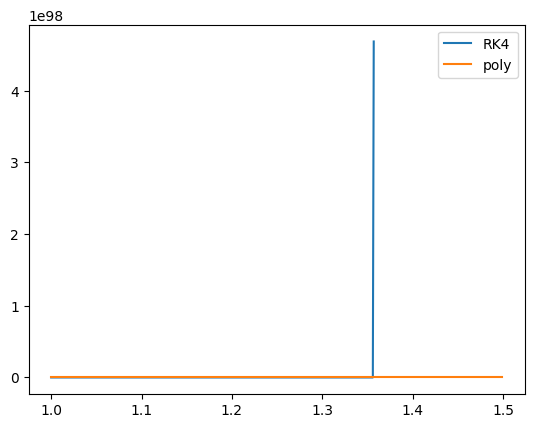

In [8]:
XY = rk4(f, x_0, y_0, n=500, dx=1e-3)
plt.plot(XY[:, 0], XY[:, 1], label="RK4")
plt.plot(XY[:, 0], XY_poly_approx, label="poly")
plt.legend()
plt.show()